In [2]:
rootmed1 = Path('/archive/Harris.Longfield/fre/NWA/2024_06/NWA12_COBALT_2024_06_medatm_ens_1/gfdl.ncrc5-intel22-prod') 
rootlow1 = Path('/archive/Harris.Longfield/fre/NWA/2024_06/NWA12_COBALT_2024_06_lowatm_ens_1/gfdl.ncrc5-intel22-prod')
rootmed2 = Path('/archive/Harris.Longfield/fre/NWA/2024_06/NWA12_COBALT_2024_06_medatm_ens_2/gfdl.ncrc5-intel22-prod') 
rootlow2 = Path('/archive/Harris.Longfield/fre/NWA/2024_06/NWA12_COBALT_2024_06_lowatm_ens_2/gfdl.ncrc5-intel22-prod')
rootmed3 = Path('/archive/Harris.Longfield/fre/NWA/2024_06/NWA12_COBALT_2024_06_medatm_ens_3/gfdl.ncrc5-intel22-prod') 
rootlow3 = Path('/archive/Harris.Longfield/fre/NWA/2024_06/NWA12_COBALT_2024_06_lowatm_ens_3/gfdl.ncrc5-intel22-prod')
rootmed4 = Path('/archive/Harris.Longfield/fre/NWA/2024_06/NWA12_COBALT_2024_06_medatm_ens_4/gfdl.ncrc5-intel22-prod') 
rootlow4 = Path('/archive/Harris.Longfield/fre/NWA/2024_06/NWA12_COBALT_2024_06_lowatm_ens_4/gfdl.ncrc5-intel22-prod')
rootmed5 = Path('/archive/Harris.Longfield/fre/NWA/2024_06/NWA12_COBALT_2024_06_medatm_ens_5/gfdl.ncrc5-intel22-prod') 
rootlow5 = Path('/archive/Harris.Longfield/fre/NWA/2024_06/NWA12_COBALT_2024_06_lowatm_ens_5/gfdl.ncrc5-intel22-prod')

In [1]:
import cartopy.feature as feature
import cartopy.crs as ccrs
from calendar import month_abbr
import matplotlib.dates as mdates
from pathlib import Path 
import subprocess 
from cartopy.mpl.geoaxes import GeoAxes
import matplotlib.gridspec as gridspec
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid
import datetime
import numpy as np
import pandas as pd
import xarray
import xesmf
import os 
from glob import glob
from plot_common import autoextend_colorbar, corners, get_map_norm, open_var, add_ticks, annotate_skill, save_figure
from scipy.stats import ttest_1samp
import statistics
import scipy 
import xgcm

In [3]:
def open_var(pp_root, kind, var):
    freq = 'daily' if 'daily' in kind else 'monthly'
    longslice = '19930101-19981231' if freq == 'daily' else '199301-199812'
    longfile = os.path.join(pp_root, 'pp', kind, 'ts', freq, '5yr', f'{kind}.{longslice}.{var}.nc')
    if os.path.isfile(longfile):
        os.system(f'dmget {longfile}')
        return xarray.open_dataset(longfile)[var]
    elif len(glob(os.path.join(pp_root, 'pp', kind, 'ts', freq, '1yr', f'{kind}.*.{var}.nc'))) > 0:
        files = glob(os.path.join(pp_root, 'pp', kind, 'ts', freq, '1yr', f'{kind}.*.{var}.nc'))
        os.system(f'dmget {" ".join(files)}')
        return xarray.open_mfdataset(files)[var]
    elif len(glob(os.path.join(pp_root, 'pp', kind, 'ts', freq, '5yr', f'{kind}.*.{var}.nc'))) > 0:
        files = glob(os.path.join(pp_root, 'pp', kind, 'ts', freq, '5yr', f'{kind}.*.{var}.nc'))
        os.system(f'dmget {" ".join(files)}')
        return xarray.open_mfdataset(files)[var]
    else:
        raise Exception('Did not find postprocessed files')

In [4]:
sstwholemed1 = open_var(rootmed1, 'ocean_monthly', 'tos').resample(time = "1MS").first().sel(time=slice("1997","2007")) 
sstwholelow1 = open_var(rootlow1, 'ocean_monthly', 'tos').resample(time = "1MS").first().sel(time=slice("1997","2007")) 
sstwholemed2 = open_var(rootmed2, 'ocean_monthly', 'tos').resample(time = "1MS").first().sel(time=slice("1997","2007")) 
sstwholelow2 = open_var(rootlow2, 'ocean_monthly', 'tos').resample(time = "1MS").first().sel(time=slice("1997","2007"))
sstwholemed3 = open_var(rootmed3, 'ocean_monthly', 'tos').resample(time = "1MS").first().sel(time=slice("1997","2007")) 
sstwholelow3 = open_var(rootlow3, 'ocean_monthly', 'tos').resample(time = "1MS").first().sel(time=slice("1997","2007")) 
sstwholemed4 = open_var(rootmed4, 'ocean_monthly', 'tos').resample(time = "1MS").first().sel(time=slice("1997","2007"))  
sstwholelow4 = open_var(rootlow4, 'ocean_monthly', 'tos').resample(time = "1MS").first().sel(time=slice("1997","2007")) 
sstwholemed5 = open_var(rootmed5, 'ocean_monthly', 'tos').resample(time = "1MS").first().sel(time=slice("1997","2007"))  
sstwholelow5 = open_var(rootlow5, 'ocean_monthly', 'tos').resample(time = "1MS").first().sel(time=slice("1997","2007")) 

In [5]:
sstwholelow = xarray.concat([sstwholelow1, sstwholelow2, sstwholelow3, sstwholelow4, sstwholelow5], dim='time') 

In [6]:
sstwholemed = xarray.concat([sstwholemed1, sstwholemed2, sstwholemed3, sstwholemed4, sstwholemed5], dim='time') 

In [11]:
sstwholelowmean = sstwholelow.mean() 
sstwholemedmean = sstwholemed.mean() 

In [12]:
sstwholeanomlow = sstwholelow - sstwholelowmean 
sstwholeanommed = sstwholemed - sstwholemedmean

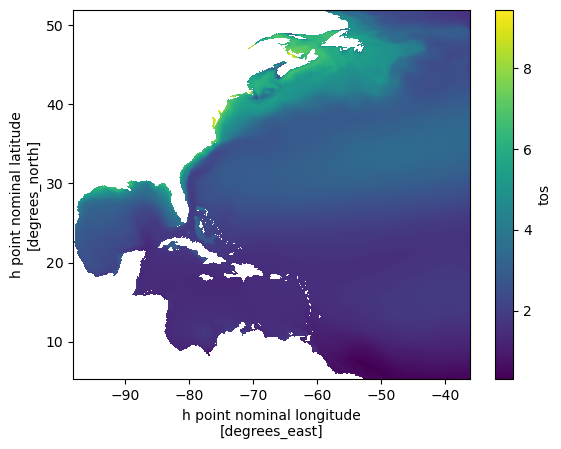

In [13]:
sstwholeanomlow.std('time').plot() 

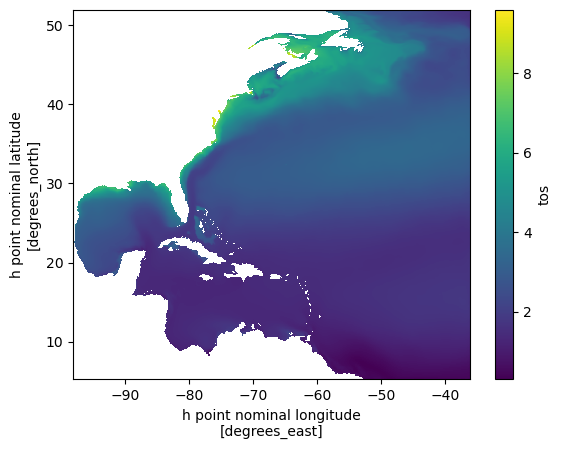

In [14]:
sstwholeanommed.std('time').plot() 

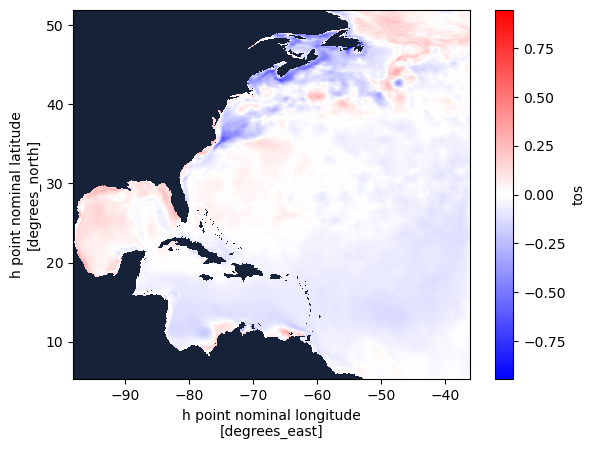

In [19]:
(sstwholeanommed.std('time') - sstwholeanomlow.std('time')).plot(cmap='bwr') 
plt.gca().set_facecolor('#152238')
plt.rcParams['figure.dpi'] = 1200

In [24]:
(sstwholeanommed.std('time') - sstwholeanomlow.std('time')).plot(cmap='bwr', vmin=-0.5, vmax=0.5) 
plt.gca().set_facecolor('#152238')
plt.rcParams['figure.dpi'] = 2400

In [25]:
_LAND_50M = feature.NaturalEarthFeature(
    'physical', 'land', '50m',
    edgecolor='face',
    facecolor='#152238'
    )

fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

ax = fig.add_subplot(projection=ccrs.PlateCarree())

ax.add_feature(_LAND_50M)

(sstwholeanommed.std('time') - sstwholeanomlow.std('time')).plot(ax=ax, cmap='bwr', vmin=-0.5, vmax=0.5) 

ax.legend(loc = 'lower right', frameon=False, ncol=2, markerscale=4.0)

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_extent([-82, -50, 30, 44])

ax.spines['geo'].set_visible(False)
plt.rcParams['figure.dpi'] = 1200
# Show the plot
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
